In [1]:

from urllib.request import urlopen as uReq
from bs4 import BeautifulSoup as soup

# flipkart url:- brand filter:Oppo,Vivo,Samsung,Mi,Realme |Price filter: 7000-100000 | Only Available
flipkart_link = "https://www.flipkart.com/mobiles/pr?sid=tyy%2C4io&p%5B%5D=facets.price_range.from%3D7000&otracker=categorytree&p%5B%5D=facets.price_range.to%3DMax&p%5B%5D=facets.brand%255B%255D%3DRealme&p%5B%5D=facets.brand%255B%255D%3DSamsung&p%5B%5D=facets.brand%255B%255D%3DMi&p%5B%5D=facets.brand%255B%255D%3DVivo&p%5B%5D=facets.brand%255B%255D%3DOPPO&p%5B%5D=facets.brand%255B%255D%3Dxiaomi&p%5B%5D=facets.serviceability%5B%5D%3Dtrue&p%5B%5D=facets.availability%255B%255D%3DExclude%2BOut%2Bof%2BStock&page="

# opening 16 webpages, grabbing page responses and storing it into a list. 
HTTP_response_list = []
for i in range(1,17):
    try:
        uClient = uReq(flipkart_link+str(i))
        HTTP_response = uClient.read()
        HTTP_response_list.append(HTTP_response)
    except:
        print(Exception)
        print(str(i)+" pages downloaded successfully.")
    print("Page "+str(i)+" Downloaded.")
uClient.close()
print("Grabbed all pages")

# parsing HTTP_response(byte file) into HTML and storing all pages into a list.
soup_objects_list = []
for i in HTTP_response_list:
    HTML_page=soup(i,"html.parser")
    soup_objects_list.append(HTML_page)    

Page 1 Downloaded.
Page 2 Downloaded.
Page 3 Downloaded.
Page 4 Downloaded.
Page 5 Downloaded.
Page 6 Downloaded.
Page 7 Downloaded.
Page 8 Downloaded.
Page 9 Downloaded.
Page 10 Downloaded.
Page 11 Downloaded.
Page 12 Downloaded.
Page 13 Downloaded.
Page 14 Downloaded.
Page 15 Downloaded.
Page 16 Downloaded.
Grabbed all pages


In [2]:
# parsing all details into pandas DataFrame

import pandas as pd

ram_rom_list = []
display_list = []
camera_list = []
battery_list = []
processor_list = []

def fetch_data(soup_obj,class_name):
    data_list = []
    for i in soup_obj:
        tags = i.findAll("div",{"class":class_name})
        for tag in tags:
            data_list.append(tag.text)
    return data_list
product_name_list = fetch_data(soup_objects_list,"_3wU53n")
offer_price_list = fetch_data(soup_objects_list,"_1vC4OE _2rQ-NK")
for i in soup_objects_list:
    product_spec_tags = i.findAll("li",{"class":"tVe95H"})
    for spec_tag in product_spec_tags:
        if "RAM" in spec_tag.text and "ROM" in spec_tag.text:
            ram_rom_list.append(spec_tag.text)
            c = 0
        if c==1:
            display_list.append(spec_tag.text)
        elif c==2:
            camera_list.append(spec_tag.text)
        elif c==3:
            battery_list.append(spec_tag.text)
        elif c==4:
            processor_list.append(spec_tag.text)
        else:
            pass
        c+=1
print(len(product_name_list))
data_dict = {"Product Name":product_name_list,"RAM & ROM":ram_rom_list,"Display":display_list,"Camera":camera_list,
             "Battery":battery_list,"Processor":processor_list,"Offer Price":offer_price_list}        

flipkart_data = pd.DataFrame(data_dict)
flipkart_data.head()

384


,Product Name,RAM & ROM,Display,Camera,Battery,Processor,Offer Price
0,"Realme 5 (Crystal Blue, 128 GB)",4 GB RAM | 128 GB ROM | Expandable Upto 256 GB,16.51 cm (6.5 inch) HD+ Display,12MP + 8MP + 2MP + 2MP | 13MP Front Camera,5000 mAH Battery,Qualcomm Snapdragon 665 2 GHz Processor,"₹10,999"
1,"Realme 5 (Crystal Blue, 32 GB)",3 GB RAM | 32 GB ROM | Expandable Upto 256 GB,16.51 cm (6.5 inch) HD+ Display,12MP + 8MP + 2MP + 2MP | 13MP Front Camera,5000 mAH Battery,Qualcomm Snapdragon 665 2 GHz Processor,"₹8,999"
2,"Realme 5 (Crystal Purple, 128 GB)",4 GB RAM | 128 GB ROM | Expandable Upto 256 GB,16.51 cm (6.5 inch) HD+ Display,12MP + 8MP + 2MP + 2MP | 13MP Front Camera,5000 mAH Battery,Qualcomm Snapdragon 665 2 GHz Processor,"₹10,999"
3,"Realme 5 (Crystal Purple, 32 GB)",3 GB RAM | 32 GB ROM | Expandable Upto 256 GB,16.51 cm (6.5 inch) HD+ Display,12MP + 8MP + 2MP + 2MP | 13MP Front Camera,5000 mAH Battery,Qualcomm Snapdragon 665 2 GHz Processor,"₹8,999"
4,"Realme 5 (Crystal Blue, 64 GB)",4 GB RAM | 64 GB ROM | Expandable Upto 256 GB,16.51 cm (6.5 inch) HD+ Display,12MP + 8MP + 2MP + 2MP | 13MP Front Camera,5000 mAH Battery,Qualcomm Snapdragon 665 2 GHz Processor,"₹9,999"


In [3]:
pd.set_option('display.max_rows', len(flipkart_data))
flipkart_data

,Product Name,RAM & ROM,Display,Camera,Battery,Processor,Offer Price
0,"Realme 5 (Crystal Blue, 128 GB)",4 GB RAM | 128 GB ROM | Expandable Upto 256 GB,16.51 cm (6.5 inch) HD+ Display,12MP + 8MP + 2MP + 2MP | 13MP Front Camera,5000 mAH Battery,Qualcomm Snapdragon 665 2 GHz Processor,"₹10,999"
1,"Realme 5 (Crystal Blue, 32 GB)",3 GB RAM | 32 GB ROM | Expandable Upto 256 GB,16.51 cm (6.5 inch) HD+ Display,12MP + 8MP + 2MP + 2MP | 13MP Front Camera,5000 mAH Battery,Qualcomm Snapdragon 665 2 GHz Processor,"₹8,999"
2,"Realme 5 (Crystal Purple, 128 GB)",4 GB RAM | 128 GB ROM | Expandable Upto 256 GB,16.51 cm (6.5 inch) HD+ Display,12MP + 8MP + 2MP + 2MP | 13MP Front Camera,5000 mAH Battery,Qualcomm Snapdragon 665 2 GHz Processor,"₹10,999"
3,"Realme 5 (Crystal Purple, 32 GB)",3 GB RAM | 32 GB ROM | Expandable Upto 256 GB,16.51 cm (6.5 inch) HD+ Display,12MP + 8MP + 2MP + 2MP | 13MP Front Camera,5000 mAH Battery,Qualcomm Snapdragon 665 2 GHz Processor,"₹8,999"
4,"Realme 5 (Crystal Blue, 64 GB)",4 GB RAM | 64 GB ROM | Expandable Upto 256 GB,16.51 cm (6.5 inch) HD+ Display,12MP + 8MP + 2MP + 2MP | 13MP Front Camera,5000 mAH Battery,Qualcomm Snapdragon 665 2 GHz Processor,"₹9,999"
5,"Realme XT (Pearl Blue, 64 GB)",4 GB RAM | 64 GB ROM | Expandable Upto 256 GB,16.26 cm (6.4 inch) Display,64MP + 8MP + 2MP + 2MP Quad Camera | 16MP Fron...,4000 mAh Battery,Qualcomm 712 Processor,"₹15,999"
6,"Realme 3 Pro (Lightning Purple, 128 GB)",6 GB RAM | 128 GB ROM | Expandable Upto 256 GB,16.0 cm (6.3 inch) FHD+ Display,16MP + 5MP | 25MP Front Camera,4045 mAh Battery,Qualcomm Snapdragon 710 Octa Core 2.2 GHz AIE ...,"₹12,999"
7,"Realme 3 Pro (Lightning Purple, 64 GB)",4 GB RAM | 64 GB ROM | Expandable Upto 256 GB,16.0 cm (6.3 inch) FHD+ Display,16MP + 5MP | 25MP Front Camera,4045 mAh Battery,Qualcomm Snapdragon 710 Octa Core 2.2 GHz AIE ...,"₹9,999"
8,"Realme 3 Pro (Nitro Blue, 64 GB)",4 GB RAM | 64 GB ROM | Expandable Upto 256 GB,16.0 cm (6.3 inch) FHD+ Display,16MP + 5MP | 25MP Front Camera,4045 mAh Battery,Qualcomm Snapdragon 710 Octa Core 2.2 GHz AIE ...,"₹9,999"
9,"Realme 3 Pro (Nitro Blue, 64 GB)",6 GB RAM | 64 GB ROM | Expandable Upto 256 GB,16.0 cm (6.3 inch) FHD+ Display,16MP + 5MP | 25MP Front Camera,4045 mAh Battery,Qualcomm Snapdragon 710 Octa Core 2.2 GHz AIE ...,"₹11,999"


In [4]:

# getting Brand name
flipkart_data.insert(0,"Brand",[x.split()[0] for x in flipkart_data["Product Name"]])

# Converting price into integer
flipkart_data["Offer Price"] = [int(i.replace(",","")[1:]) for i in flipkart_data["Offer Price"]]

# Getting Battery Power
flipkart_data.insert(6,"Battery_Power(mAh)",[int(x.split()[0]) for x in flipkart_data["Battery"]])

# Spliting "RAM & ROM" and creating different list
RAM_list = [i.split("|")[0].strip() for i in flipkart_data["RAM & ROM"]]
ROM_list = [i.split("|")[1].strip() for i in flipkart_data["RAM & ROM"]]

# adding RAM & ROM (number of GB's)
flipkart_data["RAM (GB)"] = [float(i.split()[0]) for i in RAM_list]
flipkart_data["ROM (GB)"] = [float(i.split()[0]) for i in ROM_list]

flipkart_data.head()

,Brand,Product Name,RAM & ROM,Display,Camera,Battery,Battery_Power(mAh),Processor,Offer Price,RAM (GB),ROM (GB)
0,Realme,"Realme 5 (Crystal Blue, 128 GB)",4 GB RAM | 128 GB ROM | Expandable Upto 256 GB,16.51 cm (6.5 inch) HD+ Display,12MP + 8MP + 2MP + 2MP | 13MP Front Camera,5000 mAH Battery,5000,Qualcomm Snapdragon 665 2 GHz Processor,10999,4.0,128.0
1,Realme,"Realme 5 (Crystal Blue, 32 GB)",3 GB RAM | 32 GB ROM | Expandable Upto 256 GB,16.51 cm (6.5 inch) HD+ Display,12MP + 8MP + 2MP + 2MP | 13MP Front Camera,5000 mAH Battery,5000,Qualcomm Snapdragon 665 2 GHz Processor,8999,3.0,32.0
2,Realme,"Realme 5 (Crystal Purple, 128 GB)",4 GB RAM | 128 GB ROM | Expandable Upto 256 GB,16.51 cm (6.5 inch) HD+ Display,12MP + 8MP + 2MP + 2MP | 13MP Front Camera,5000 mAH Battery,5000,Qualcomm Snapdragon 665 2 GHz Processor,10999,4.0,128.0
3,Realme,"Realme 5 (Crystal Purple, 32 GB)",3 GB RAM | 32 GB ROM | Expandable Upto 256 GB,16.51 cm (6.5 inch) HD+ Display,12MP + 8MP + 2MP + 2MP | 13MP Front Camera,5000 mAH Battery,5000,Qualcomm Snapdragon 665 2 GHz Processor,8999,3.0,32.0
4,Realme,"Realme 5 (Crystal Blue, 64 GB)",4 GB RAM | 64 GB ROM | Expandable Upto 256 GB,16.51 cm (6.5 inch) HD+ Display,12MP + 8MP + 2MP + 2MP | 13MP Front Camera,5000 mAH Battery,5000,Qualcomm Snapdragon 665 2 GHz Processor,9999,4.0,64.0


In [5]:
# checking columns
flipkart_data.columns

Index(['Brand', 'Product Name', 'RAM & ROM', 'Display', 'Camera', 'Battery',
       'Battery_Power(mAh)', 'Processor', 'Offer Price', 'RAM (GB)',
       'ROM (GB)'],
      dtype='object')

#### checking any unexcepted value.

In [6]:
print("Brands:",flipkart_data.Brand.unique())

Brands: ['Realme' 'Redmi' 'Vivo' 'Mi' 'OPPO' 'Samsung']


In [7]:
flipkart_data.Brand.replace("Mi","Redmi",inplace = True)
print("Brands:",flipkart_data.Brand.unique())

Brands: ['Realme' 'Redmi' 'Vivo' 'OPPO' 'Samsung']


In [8]:
print("Battery Power:",flipkart_data["Battery_Power(mAh)"].unique())

Battery Power: [5000 4000 4045 4035 4230 4030 3765 3700 3500 4100 3400 4500 3000 3080
 3300 4020 3360 6000 3225 3200 3180 3260 3010 2630 2900 2600 3800 2000
 3100 2100 3410 4065 4300 3315 3600 2730 2500 2800 2400]


In [9]:
print("Price:",flipkart_data["Offer Price"].unique())

Price: [ 10999   8999   9999  15999  12999  11999   7999  13999  15990  13990
  14999   8322   8248  10880  12739  17495  15637   7699   7598   7990
  19999   8490  18999  21990   7794  27990  19990   9990  11990   9145
  17990  16990  18990  23990   9490   8935   9573   8299  28999  22999
   8699   8429   7490  26990   9195   9395   9758  10990  11490  10490
  15499   8488   9708   8990   8689  12990  21490   9499   7499   8499
  10499  15490  69999  61900  22221  13800  14990   9998  20779   7980
  27999  25999   8588  21999  50650  14796   9420  34999   7135   7099
   7340  49990  14383  36990  11499  14490  30999  12620   9899  66999
   8599  16390  10975   8570  13500  49590  12500  29999  20990  14995
  17490  31900  17889  50100  15300   8799  14499  28990  10899  11899
  14599   9933   8425   9330   9290  39990  26600  79999  11299  11890
  24990   9600   7399  17980  25900  12290  69900  29990  53990  13490
  14500  20390  77900 113900  25500  73600  68999  50990  73799   8850

In [10]:
print("RAM",flipkart_data["RAM (GB)"].unique())

RAM [ 4.   3.   6.   8.   2.   1.5  1.  12. ]


In [11]:
print("ROM",flipkart_data["ROM (GB)"].unique())

ROM [128.  32.  64. 256.  16. 512.   8.   1.]


#### 1GB ROM??? :/

In [12]:
flipkart_data[flipkart_data["ROM (GB)"]==1]

,Brand,Product Name,RAM & ROM,Display,Camera,Battery,Battery_Power(mAh),Processor,Offer Price,RAM (GB),ROM (GB)
321,Samsung,"Samsung Galaxy S10 Plus (Ceramic White, 1 TB)",12 GB RAM | 1 TB ROM | Expandable Upto 512 GB,16.26 cm (6.4 inch) Quad HD+ Display,16MP + 12MP | 10MP + 8MP Dual Front Camera,4100 mAh Lithium-ion Battery,4100,Exynos 9 9820 Processor,113900,12.0,1.0


#### It is 1TB ROM, we need to convert it into GB's.

In [13]:
flipkart_data.loc[321,"ROM (GB)"] = 1024
flipkart_data.head()

,Brand,Product Name,RAM & ROM,Display,Camera,Battery,Battery_Power(mAh),Processor,Offer Price,RAM (GB),ROM (GB)
0,Realme,"Realme 5 (Crystal Blue, 128 GB)",4 GB RAM | 128 GB ROM | Expandable Upto 256 GB,16.51 cm (6.5 inch) HD+ Display,12MP + 8MP + 2MP + 2MP | 13MP Front Camera,5000 mAH Battery,5000,Qualcomm Snapdragon 665 2 GHz Processor,10999,4.0,128.0
1,Realme,"Realme 5 (Crystal Blue, 32 GB)",3 GB RAM | 32 GB ROM | Expandable Upto 256 GB,16.51 cm (6.5 inch) HD+ Display,12MP + 8MP + 2MP + 2MP | 13MP Front Camera,5000 mAH Battery,5000,Qualcomm Snapdragon 665 2 GHz Processor,8999,3.0,32.0
2,Realme,"Realme 5 (Crystal Purple, 128 GB)",4 GB RAM | 128 GB ROM | Expandable Upto 256 GB,16.51 cm (6.5 inch) HD+ Display,12MP + 8MP + 2MP + 2MP | 13MP Front Camera,5000 mAH Battery,5000,Qualcomm Snapdragon 665 2 GHz Processor,10999,4.0,128.0
3,Realme,"Realme 5 (Crystal Purple, 32 GB)",3 GB RAM | 32 GB ROM | Expandable Upto 256 GB,16.51 cm (6.5 inch) HD+ Display,12MP + 8MP + 2MP + 2MP | 13MP Front Camera,5000 mAH Battery,5000,Qualcomm Snapdragon 665 2 GHz Processor,8999,3.0,32.0
4,Realme,"Realme 5 (Crystal Blue, 64 GB)",4 GB RAM | 64 GB ROM | Expandable Upto 256 GB,16.51 cm (6.5 inch) HD+ Display,12MP + 8MP + 2MP + 2MP | 13MP Front Camera,5000 mAH Battery,5000,Qualcomm Snapdragon 665 2 GHz Processor,9999,4.0,64.0


In [14]:
# checking the Brand wise total count.
flipkart_data.groupby("Brand").count()

,Product Name,RAM & ROM,Display,Camera,Battery,Battery_Power(mAh),Processor,Offer Price,RAM (GB),ROM (GB)
Brand,,,,,,,,,,
OPPO,54,54,54,54,54,54,54,54,54,54
Realme,50,50,50,50,50,50,50,50,50,50
Redmi,94,94,94,94,94,94,94,94,94,94
Samsung,124,124,124,124,124,124,123,124,124,124
Vivo,62,62,62,62,62,62,62,62,62,62


#### We need to make count equal for further analysis.

In [15]:
realme_data = flipkart_data[flipkart_data.Brand =="Realme"]
redmi_data = flipkart_data[flipkart_data.Brand =="Redmi"]
Vivo_data =flipkart_data[flipkart_data.Brand =="Vivo"]
Samsung_data =flipkart_data[flipkart_data.Brand =="Samsung"]
Oppo_data =flipkart_data[flipkart_data.Brand =="OPPO"]
temp_list = [redmi_data,Vivo_data,Samsung_data,Oppo_data]

In [16]:
# creating function for 
import random
def equal_count(df):
    ''' This function will take a dataframe and return dataframe with length of 50. Because
    we have lowest count of products is 50 which is for realme. This function will
    select 50 random products details from existing all products.
    '''
    df.reset_index(inplace = True,drop = True)
    rand_list = random.sample(range(0, len(df)), 50)
    return df.iloc[rand_list,:]


In [17]:
# Storing all product details in a dataframe with applying function which will select random 50 products from each brand.
data = realme_data.copy()
for i in temp_list:
    data = data.append(equal_count(i))
data.reset_index(inplace = True,drop = True)
len(data)

250

## EDA

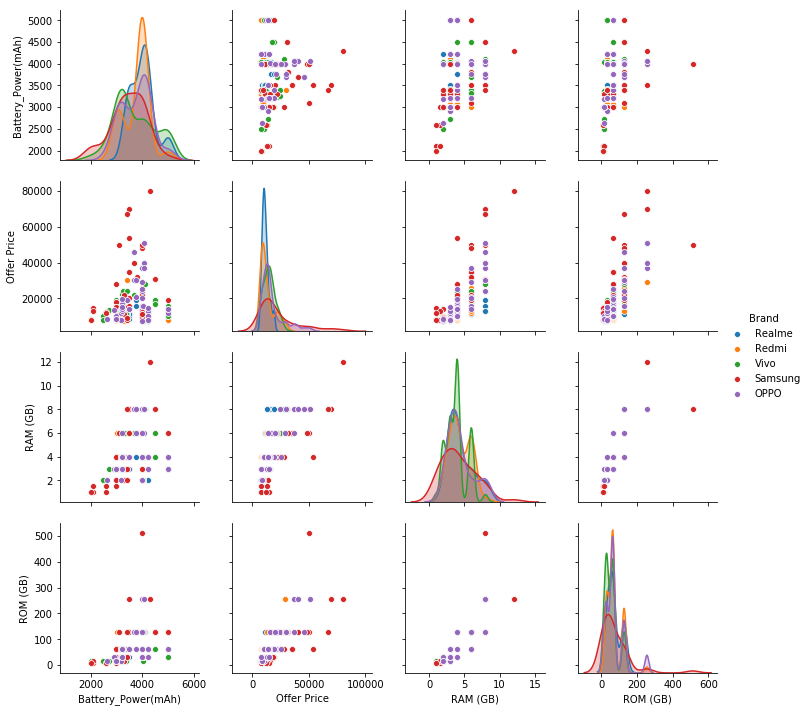

In [18]:
# ploting pairplot 
import seaborn as sns
%matplotlib inline
sns.pairplot(data,hue = "Brand")

#### Most of the data point of every brand are overlaping each other. 
* For Offer Price, we can say there is a linear relationship of RAM and ROM with offer price but still it is not strong. Most of the data points of samsung are seperately showing in all graphs, Samsung's product configuration is something different. 

In [19]:
# splitting the data brand wise for further analysis.
realme_data = data[data.Brand =="Realme"]
redmi_data = data[data.Brand =="Redmi"]
Vivo_data =data[data.Brand =="Vivo"]
Samsung_data =data[data.Brand =="Samsung"]
Oppo_data =data[data.Brand =="OPPO"]

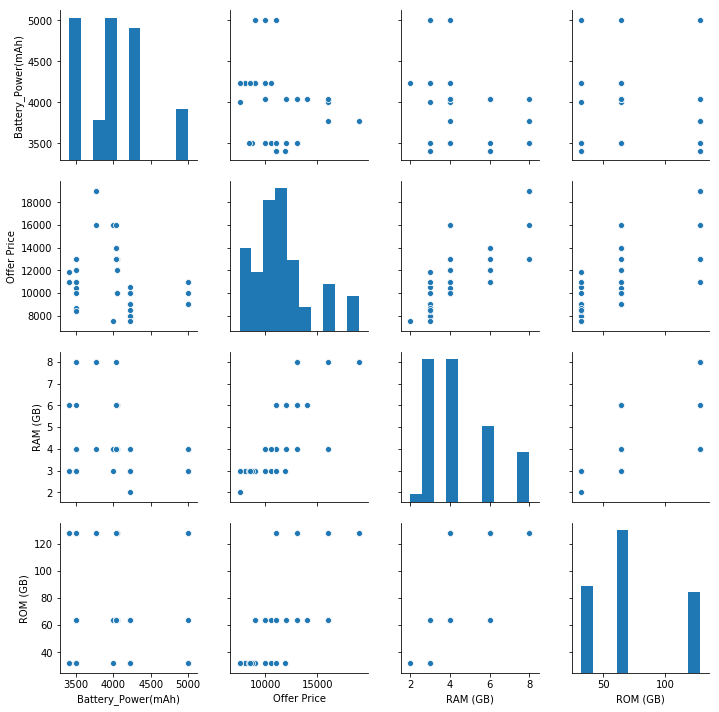

In [20]:
sns.pairplot(realme_data)

#### For RealMe, there is a average linear relationship b/w Offer price and RAM & ROM but for Battery Power there is no strong relationship with any other feature.

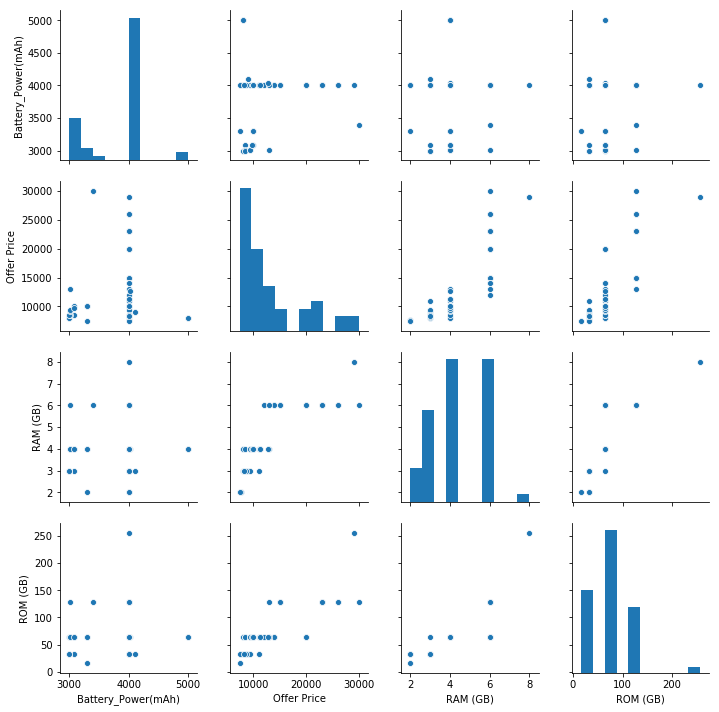

In [21]:
sns.pairplot(redmi_data)

#### For Redmi, there is a linear relationship b/w Offer price and RAM & ROM. There is also a strong relationship b/w ROM & ROM because as RAM increasing ROM also increasing.

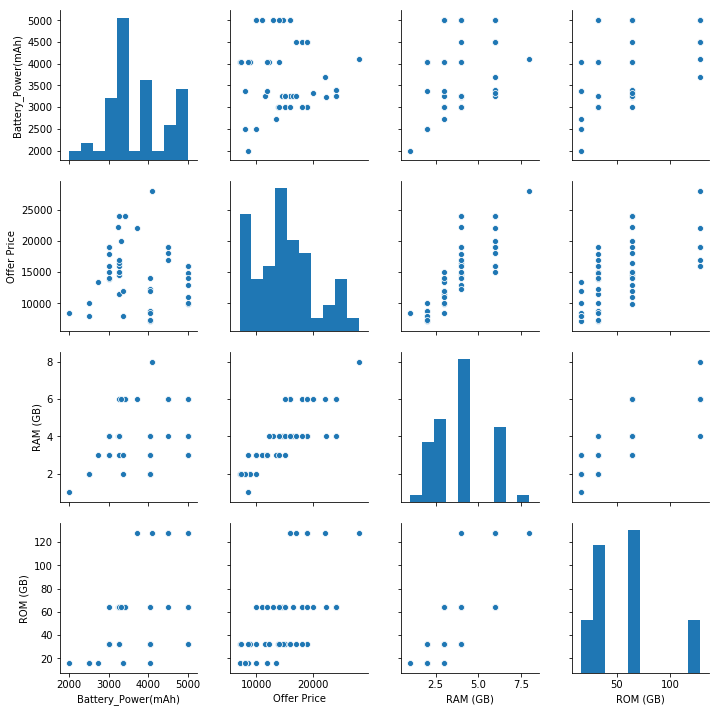

In [22]:
sns.pairplot(Vivo_data)

#### For Vivo, there is a relationship b/w Offer price and RAM, but for other features it is not strong as RAM & Offer Price

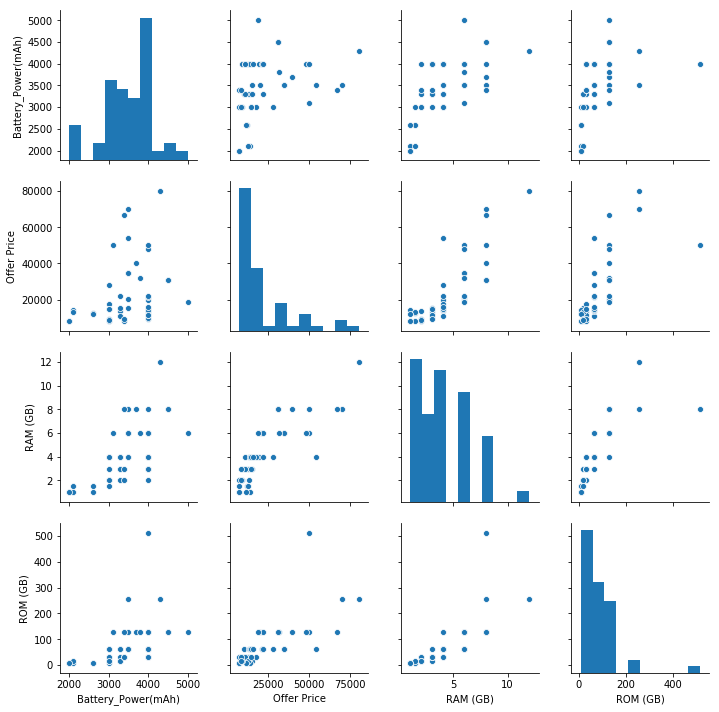

In [23]:
sns.pairplot(Samsung_data)

#### By eye-balling, we can say there is a little bit a relationship with all features in samsung, because as one feature value is increasing others also increasing.

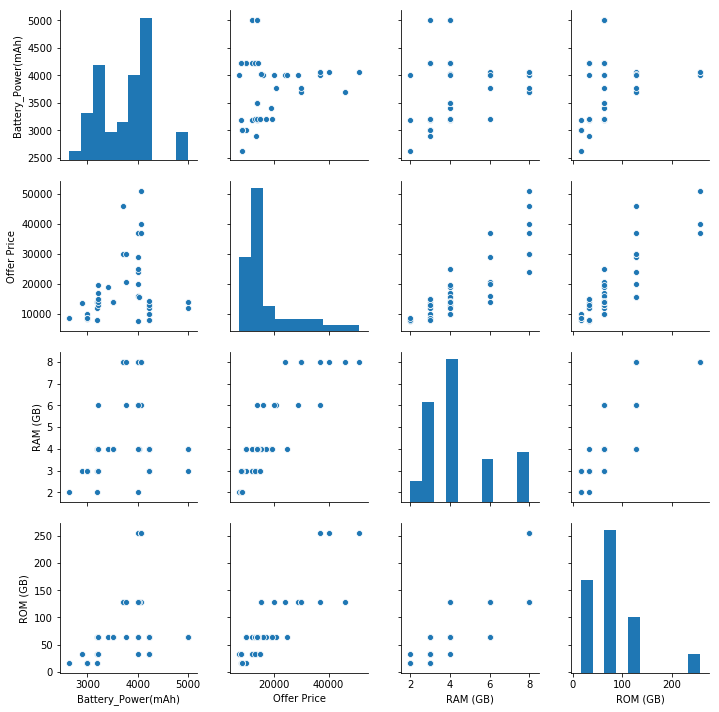

In [24]:
sns.pairplot(Oppo_data)

#### For Oppo, same as realme, there is a relationship b/w offer price and RAM & ROM and for other features also there is a relationship but not strong.

In [25]:
# getting RAM wise all brand's products average price.
data.pivot_table(index = "RAM (GB)",values="Offer Price",columns="Brand",aggfunc='mean')

Brand,OPPO,Realme,Redmi,Samsung,Vivo
RAM (GB),,,,,
1.0,NaN,NaN,NaN,10599.000000,8490.000000
1.5,NaN,NaN,NaN,11166.000000,NaN
2.0,8029.333333,7499.000000,7548.750000,9696.333333,8155.500000
3.0,11266.214286,9264.058824,8711.636364,12033.375000,11928.909091
4.0,14536.150000,11792.588235,10127.588235,20240.750000,16871.894737
6.0,22789.666667,12331.333333,19527.882353,30445.700000,19290.900000
8.0,36848.428571,16499.000000,28999.000000,48162.666667,27990.000000
12.0,NaN,NaN,NaN,79999.000000,NaN


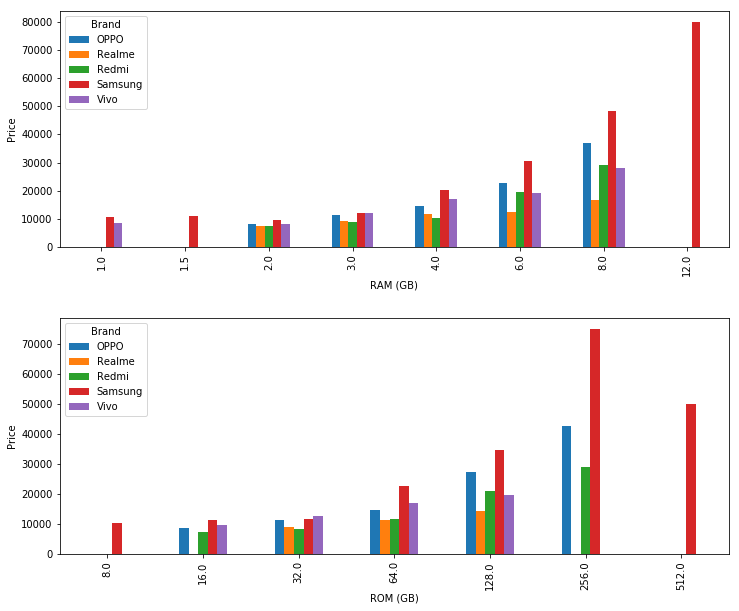

In [26]:
import matplotlib.pyplot as plt
fig, (ax1,ax2) = plt.subplots(2,1)

data.pivot_table(index = "RAM (GB)",values="Offer Price",columns="Brand",aggfunc='mean').plot(kind="bar",ax = ax1, figsize = (12,10))
data.pivot_table(index = "ROM (GB)",values="Offer Price",columns="Brand",aggfunc='mean').plot(kind="bar",ax = ax2)
ax1.set_ylabel("Price")
ax2.set_ylabel("Price")
plt.subplots_adjust(hspace=0.3)

#### In both RAM & ROM graphs, We can see, Samsung's product are most costly. 
Second is Oppo,
Third is Vivo,
Fourth is Redmi,
and last is Realme.

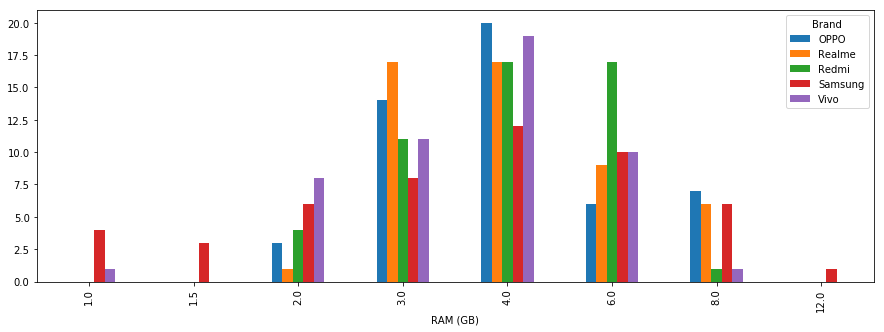

In [27]:
# Getting RAM wise all product Quantity.
data.pivot_table(index = "RAM (GB)",values="Offer Price",columns="Brand",aggfunc='count').plot(kind="bar",figsize = (15,5))

#### Most of the products of all Brands are with 4GB, 3GB and 6GB. But Samsung products are divided into all RAM categories.
1. Samsung :- 1GB, 1.5GB, 2GB, 3GB, 4GB, 6GB, 8GB, 12GB
2. OPPO    :- 3GB, 4GB, 6GB, 8GB
3. Vivo    :- 1,GB, 2GB, 3GB, 4GB, 6GB, 8GB
4. Redmi   :- 2GB, 3GB, 4GB, 6GB, 8GB
5. Realme  :- 2GB, 3GB, 4GB, 6GB, 8GB

Text(0, 0.5, 'RAM')

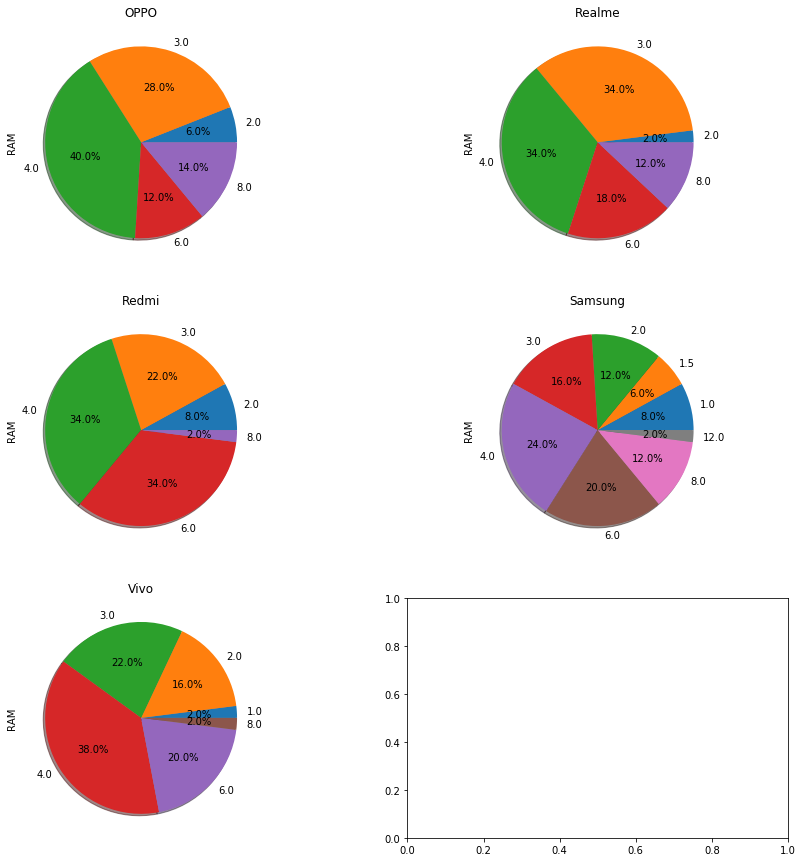

In [28]:
fig, (ax1,ax2,ax3) = plt.subplots(3,2)

# ploting Oppo's RAM contribution in total model count
oppo_plot = Oppo_data.pivot_table(index = "RAM (GB)",values="Offer Price",aggfunc='count')["Offer Price"].plot(kind = "pie",
                                                                             ax = ax1[0],autopct='%1.1f%%',shadow=True,figsize = (15,15))
oppo_plot.set_title("OPPO")
oppo_plot.set_ylabel("RAM")

# ploting Realme's RAM contribution in total model count
realme_plot = realme_data.pivot_table(index = "RAM (GB)",values="Offer Price",aggfunc='count')["Offer Price"].plot(kind = "pie",
                                                                             ax = ax1[1],autopct='%1.1f%%',shadow=True,figsize = (20,20))
realme_plot.set_title("Realme")
realme_plot.set_ylabel("RAM")

# ploting Redmi's RAM contribution in total model count
redmi_plot = redmi_data.pivot_table(index = "RAM (GB)",values="Offer Price",aggfunc='count')["Offer Price"].plot(kind = "pie",
                                                                             ax = ax2[0],autopct='%1.1f%%',shadow=True,figsize = (20,20))
redmi_plot.set_title("Redmi")
redmi_plot.set_ylabel("RAM")

# ploting Samsung's RAM contribution in total model count
samsung_plot = Samsung_data.pivot_table(index = "RAM (GB)",values="Offer Price",aggfunc='count')["Offer Price"].plot(kind = "pie",
                                                                             ax = ax2[1],autopct='%1.1f%%',shadow=True,figsize = (20,20))
samsung_plot.set_title("Samsung")
samsung_plot.set_ylabel("RAM")

# ploting VIVO's RAM contribution in total model count
Vivo_plot = Vivo_data.pivot_table(index = "RAM (GB)",values="Offer Price",aggfunc='count')["Offer Price"].plot(kind = "pie",
                                                                             ax = ax3[0],autopct='%1.1f%%',shadow=True,figsize = (15,15))
Vivo_plot.set_title("Vivo")
Vivo_plot.set_ylabel("RAM")


Text(0, 0.5, 'ROM')

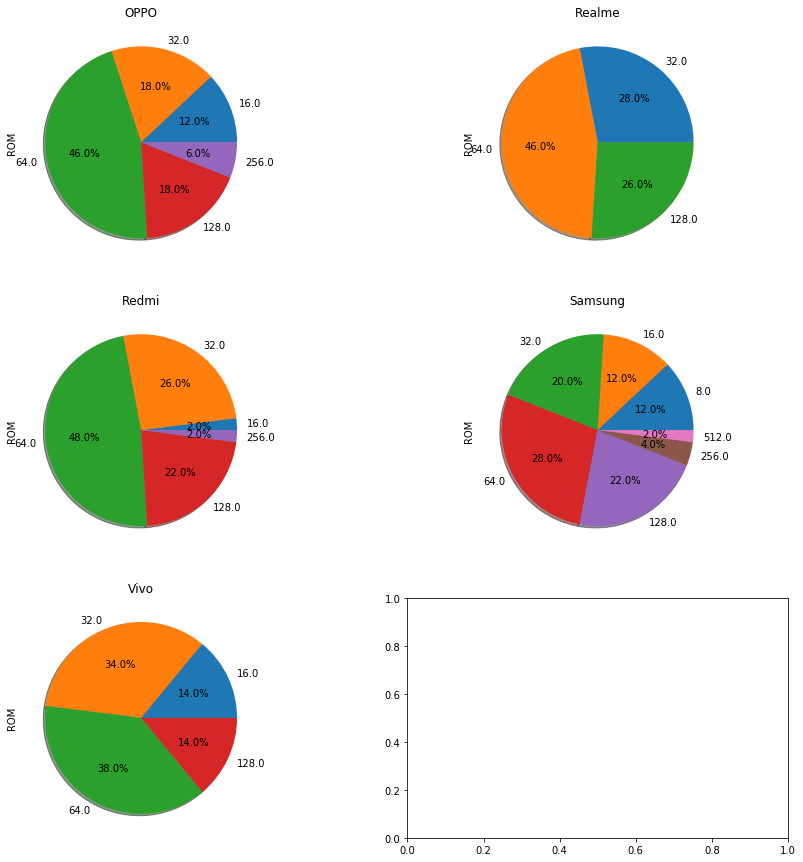

In [29]:
fig, (ax1,ax2,ax3) = plt.subplots(3,2)

# ploting Oppo's RAM contribution in total model count
oppo_plot = Oppo_data.pivot_table(index = "ROM (GB)",values="Offer Price",aggfunc='count')["Offer Price"].plot(kind = "pie",
                                                                             ax = ax1[0],autopct='%1.1f%%',shadow=True,figsize = (15,15))
oppo_plot.set_title("OPPO")
oppo_plot.set_ylabel("ROM")

# ploting Realme's RAM contribution in total model count
realme_plot = realme_data.pivot_table(index = "ROM (GB)",values="Offer Price",aggfunc='count')["Offer Price"].plot(kind = "pie",
                                                                             ax = ax1[1],autopct='%1.1f%%',shadow=True,figsize = (20,20))
realme_plot.set_title("Realme")
realme_plot.set_ylabel("ROM")

# ploting Redmi's RAM contribution in total model count
redmi_plot = redmi_data.pivot_table(index = "ROM (GB)",values="Offer Price",aggfunc='count')["Offer Price"].plot(kind = "pie",
                                                                             ax = ax2[0],autopct='%1.1f%%',shadow=True,figsize = (20,20))
redmi_plot.set_title("Redmi")
redmi_plot.set_ylabel("ROM")

# ploting Samsung's RAM contribution in total model count
samsung_plot = Samsung_data.pivot_table(index = "ROM (GB)",values="Offer Price",aggfunc='count')["Offer Price"].plot(kind = "pie",
                                                                             ax = ax2[1],autopct='%1.1f%%',shadow=True,figsize = (20,20))
samsung_plot.set_title("Samsung")
samsung_plot.set_ylabel("ROM")

# ploting VIVO's RAM contribution in total model count
Vivo_plot = Vivo_data.pivot_table(index = "ROM (GB)",values="Offer Price",aggfunc='count')["Offer Price"].plot(kind = "pie",
                                                                             ax = ax3[0],autopct='%1.1f%%',shadow=True,figsize = (15,15))
Vivo_plot.set_title("Vivo")
Vivo_plot.set_ylabel("ROM")


### Price Prediction

In [30]:
import pandas as pd
data = pd.read_csv("data.csv")
data.head()

,Battery_Power(mAh),Offer Price,RAM (GB),ROM (GB),Brand
0,5000,10999,4.0,128.0,Realme
1,5000,8999,3.0,32.0,Realme
2,5000,10999,4.0,128.0,Realme
3,5000,8999,3.0,32.0,Realme
4,5000,9999,4.0,64.0,Realme


In [31]:
# creating dummy valiable for Brand.
dummies = pd.get_dummies(data.Brand)
data1 = pd.concat([data.iloc[:,:-1],dummies.iloc[:,:-1]],axis = 1)
data1.head()

,Battery_Power(mAh),Offer Price,RAM (GB),ROM (GB),OPPO,Realme,Redmi,Samsung
0,5000,10999,4.0,128.0,0,1,0,0
1,5000,8999,3.0,32.0,0,1,0,0
2,5000,10999,4.0,128.0,0,1,0,0
3,5000,8999,3.0,32.0,0,1,0,0
4,5000,9999,4.0,64.0,0,1,0,0


In [32]:
data1.corr()

,Battery_Power(mAh),Offer Price,RAM (GB),ROM (GB),OPPO,Realme,Redmi,Samsung
Battery_Power(mAh),1.000000,-0.045426,0.241358,0.229658,0.041328,0.198455,0.108320,-0.305909
Offer Price,-0.045426,1.000000,0.627375,0.729720,0.037142,-0.205840,-0.147645,0.298405
RAM (GB),0.241358,0.627375,1.000000,0.726245,0.015826,0.074442,0.050995,-0.116058
ROM (GB),0.229658,0.729720,0.726245,1.000000,0.007991,0.013318,0.002664,0.063925
OPPO,0.041328,0.037142,0.015826,0.007991,1.000000,-0.250000,-0.250000,-0.250000
Realme,0.198455,-0.205840,0.074442,0.013318,-0.250000,1.000000,-0.250000,-0.250000
Redmi,0.108320,-0.147645,0.050995,0.002664,-0.250000,-0.250000,1.000000,-0.250000
Samsung,-0.305909,0.298405,-0.116058,0.063925,-0.250000,-0.250000,-0.250000,1.000000


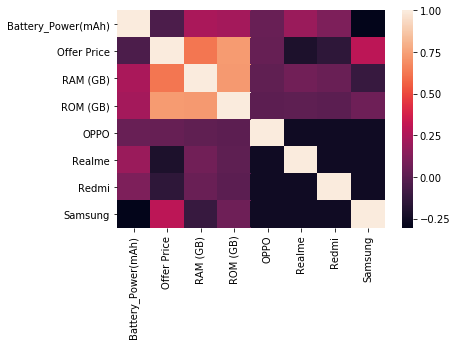

In [33]:
import seaborn as sns
sns.heatmap(data1.corr())

In [34]:
# defining X, y for training the model.
# selecting RAM & ROM for X and price for Y
X = data1.iloc[:,[2,3]].values
y = data1.iloc[:,1].values

In [35]:
# Training the model.
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score 
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [36]:
# accuracy score after prediction.
import math
lin_pred = lin_reg.predict(X_test)
pd.DataFrame({"Pred":lin_pred.round(),"Y_test":y_test}).corr()

,Pred,Y_test
Pred,1.000000,0.831716
Y_test,0.831716,1.000000


### Brand prediction

In [37]:
data.head()

,Battery_Power(mAh),Offer Price,RAM (GB),ROM (GB),Brand
0,5000,10999,4.0,128.0,Realme
1,5000,8999,3.0,32.0,Realme
2,5000,10999,4.0,128.0,Realme
3,5000,8999,3.0,32.0,Realme
4,5000,9999,4.0,64.0,Realme


In [38]:
# Brand Label Encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data["Brand_code"] = le.fit_transform(data.Brand)
data.head()

,Battery_Power(mAh),Offer Price,RAM (GB),ROM (GB),Brand,Brand_code
0,5000,10999,4.0,128.0,Realme,1
1,5000,8999,3.0,32.0,Realme,1
2,5000,10999,4.0,128.0,Realme,1
3,5000,8999,3.0,32.0,Realme,1
4,5000,9999,4.0,64.0,Realme,1


In [39]:
data.corr()

,Battery_Power(mAh),Offer Price,RAM (GB),ROM (GB),Brand_code
Battery_Power(mAh),1.000000,-0.045426,0.241358,0.229658,-0.189903
Offer Price,-0.045426,1.000000,0.627375,0.729720,0.131758
RAM (GB),0.241358,0.627375,1.000000,0.726245,-0.077092
ROM (GB),0.229658,0.729720,0.726245,1.000000,-0.039928
Brand_code,-0.189903,0.131758,-0.077092,-0.039928,1.000000


In [40]:
X = data.iloc[:,[0,2,3]].values
y = data.iloc[:,-2].values

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix  
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=9)

In [42]:
decision_reg = DecisionTreeClassifier(criterion="entropy")
decision_reg.fit(X_train,y_train)


randfor_reg = RandomForestClassifier(n_estimators = 100, random_state = 0)
randfor_reg.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [43]:
y_predicted = decision_reg.predict(X_test)
y_predic_rf = randfor_reg.predict(X_test)

In [44]:

print("Decision Tree-Accuracy Score:",accuracy_score(y_test,y_predicted))

print("Random Forest-Accuracy Score:",accuracy_score(y_test,y_predic_rf))

Decision Tree-Accuracy Score: 0.52
Random Forest-Accuracy Score: 0.5733333333333334


In [45]:
confusion_matrix(y_test,y_predicted)

array([[ 7,  3,  2,  3,  0],
       [ 4, 11,  0,  4,  0],
       [ 1,  1, 13,  0,  0],
       [ 1,  0,  7,  4,  1],
       [ 1,  2,  1,  5,  4]], dtype=int64)

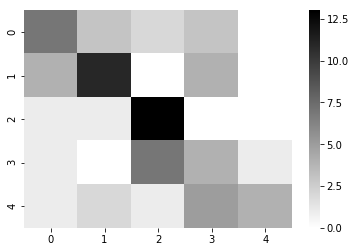

In [46]:
sns.heatmap(confusion_matrix(y_test,y_predicted),cmap="binary",)